### LORENZ TEST

In [17]:
import importlib
import json
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

from model import ESNModel
import utils
from utils import integration_lorenz


In [18]:
config_path = "lorenz.config"  # FIXME: Maybe use YAML? If you want hard-typed config, use pydantic
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [19]:
# Generate data
# TODO: Maybe make a cached data file
data, time = integration_lorenz(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data.shape=}")

data.shape=(20000, 4)


In [20]:
import model,qualification


RC_lorenz = ESNModel(config)

#importlib.reload(model)


In [40]:
importlib.reload(qualification)
KR,GR,MC = qualification.config_space(RC_lorenz,tests = 1)
print(KR,GR,MC)
MC = qualification.memory(RC_lorenz,np.random.uniform(-10,10,(200,4)),max_k=100)
print(MC)

/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:117: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

200
---
200
200.0 200.0 0
180.16707693107227


In [41]:
import model
importlib.reload(model)

training_data = data[:RC_lorenz.training_time]
expected_data = data[1:RC_lorenz.training_time+1]

testing_data = data[RC_lorenz.training_time:-1]
test_ref_data = data[RC_lorenz.training_time+1:]

loss, loss_before_training,subtrained = RC_lorenz.training(training_data,expected_data,20)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

loss_before_training=0.0140
loss=0.0138


In [42]:
output_lorenz,subsamples_lorenz = RC_lorenz.run(data,RC_lorenz.training_time,RC_lorenz.run_time-RC_lorenz.training_time)
#forced_output_lorenz, _ = RC_lorenz.run_with_input()

/home/bfish/projects/reservoir/model.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_state, torch.tensor(output)


/tmp/ipykernel_52411/3710537101.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


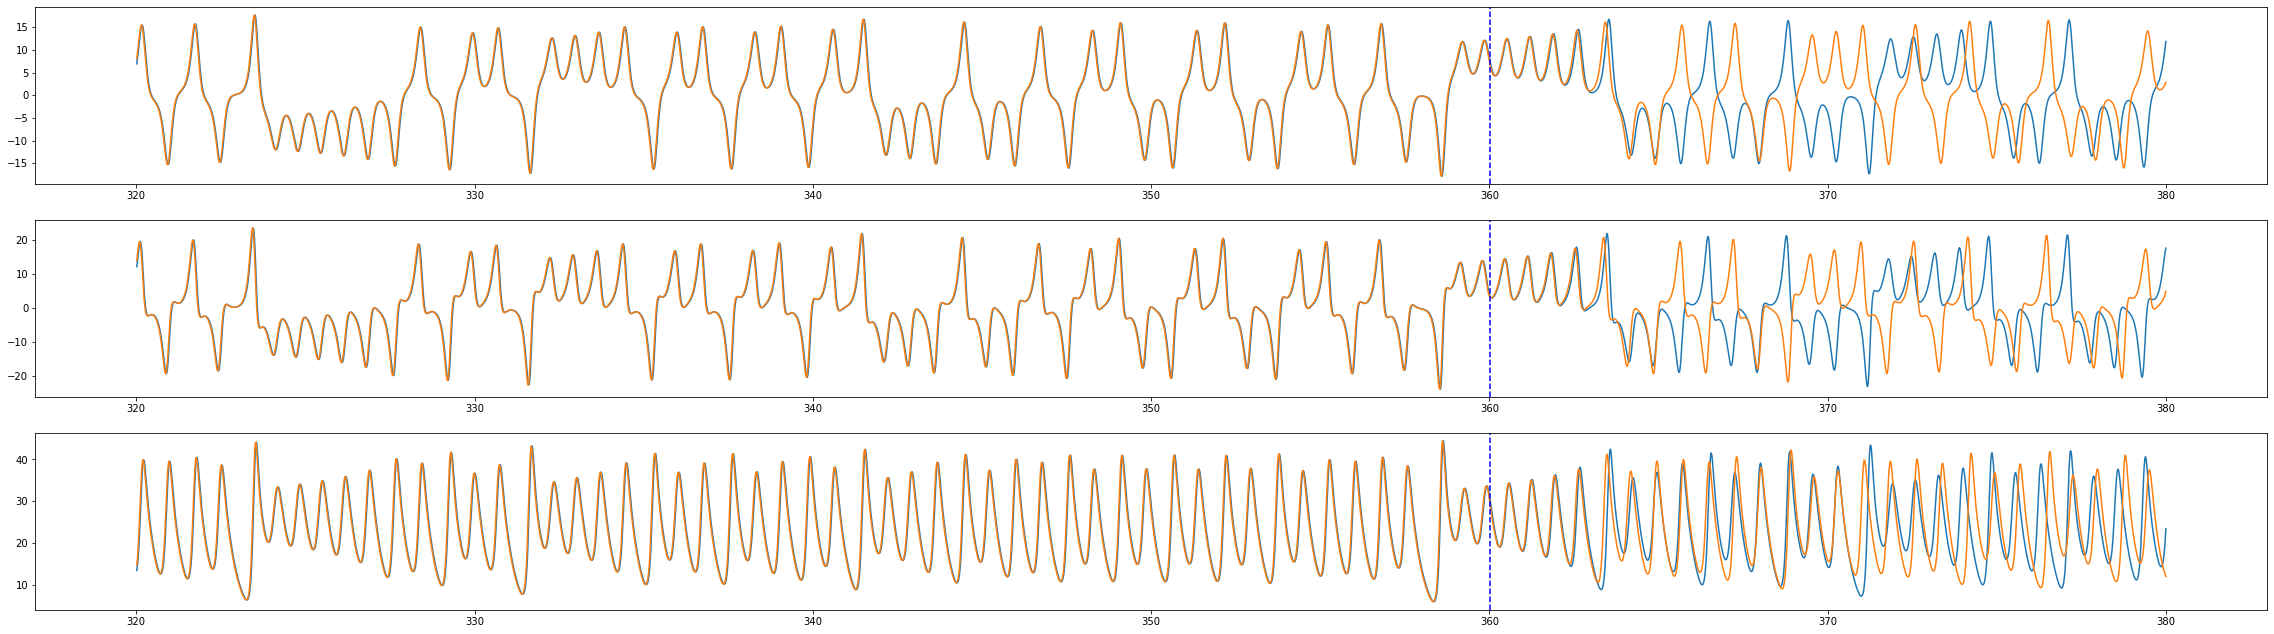

In [43]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
# utils.plot_time_sequence(RC_lorenz.training_time,RC_lorenz.training_time+1000,RC_lorenz.training_time,RC_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RC_lorenz.run_time * RC_lorenz.d_t, RC_lorenz.run_time)

utils.plot_time_sequence(
    RC_lorenz.training_time - 2000,
    RC_lorenz.training_time + 1000,
    RC_lorenz.training_time,
    torch.tensor(output_lorenz),
    torch.tensor(data),
    lorenz_time,
    3,
)

In [44]:
import qualification
importlib.reload(qualification)
importlib.reload(utils)
train_test_in = training_data[:len(testing_data)]
train_test_ref = expected_data[:len(test_ref_data)]

train_loss_list,test_lost_list = qualification.learning_curve(subtrained,train_test_in[:200],train_test_ref[:200],testing_data[:200],test_ref_data[:200])


/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:117: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

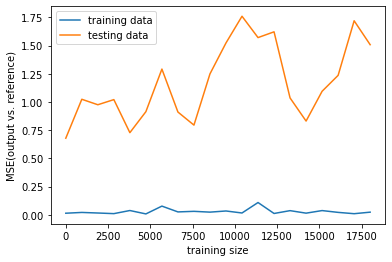

In [45]:
#fig = plt.figure()

fig,ax = plt.subplots()
tr=ax.plot(np.linspace(0,RC_lorenz.training_time,num=20),train_loss_list,label='training data')
ts=ax.plot(np.linspace(0,RC_lorenz.training_time,num=20),test_lost_list,label='testing data')
ax.set_xlabel("training size")
ax.set_ylabel("MSE(output vs. reference)")

ax.legend()

In [46]:
importlib.reload(qualification)
importlib.reload(utils)
lamda_model = qualification.lyapunov_estimate(RC_lorenz,data[0],delta_naught = 0.5,tests=20,measure_time=500,dimension = 4)
lamda_system = utils.system_lyapunov(dimension = 3, params = (10, 28, 8 / 3), tests = 20, init = (25,25,25))
print(lamda_model,lamda_system)



/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:117: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

0.007941443520484887 0.015234012772459499


### MACKEY-GLASS TEST

In [65]:

config_path = "mackey_glass.config"
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [66]:
# Generate data
# TODO: Maybe make a cached data file
data_mg, time_mg = utils.discrete_mackey_glass(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data_mg.shape=}")

data_mg.shape=(6000, 1)


In [67]:
importlib.reload(utils)

RC_mg = ESNModel(config)
#print(RC_mg.W_in)

mg_training_data = data_mg[:RC_mg.training_time]
mg_expected_data = data_mg[1:RC_mg.training_time+1]

mg_testing_data = data_mg[RC_mg.training_time:-1]
mg_test_ref_data = data_mg[RC_mg.training_time+1:]

loss, loss_before_training,_ = RC_mg.training(mg_training_data,mg_expected_data,qualification=0)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(
/home/bfish/projects/reservoir/model.py:117: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(np.dot(self.W_reservoir, prev))
/home/bfish/projects/reservoir/model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  +
/home/bfish/projects/reservoir/model.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), r

loss_before_training=28.2940
loss=0.0007


In [68]:
#output_mg,_ = RC_mg.run(data_mg,RC_mg.training_time,RC_mg.run_time-RC_mg.training_time)
output_mg,subsamples_mg = RC_mg.run(data_mg,RC_mg.training_time,RC_mg.run_time-RC_mg.training_time)

/home/bfish/projects/reservoir/model.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_state, sample, prediction = self.forward(


/tmp/ipykernel_52411/3693485088.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_mg),


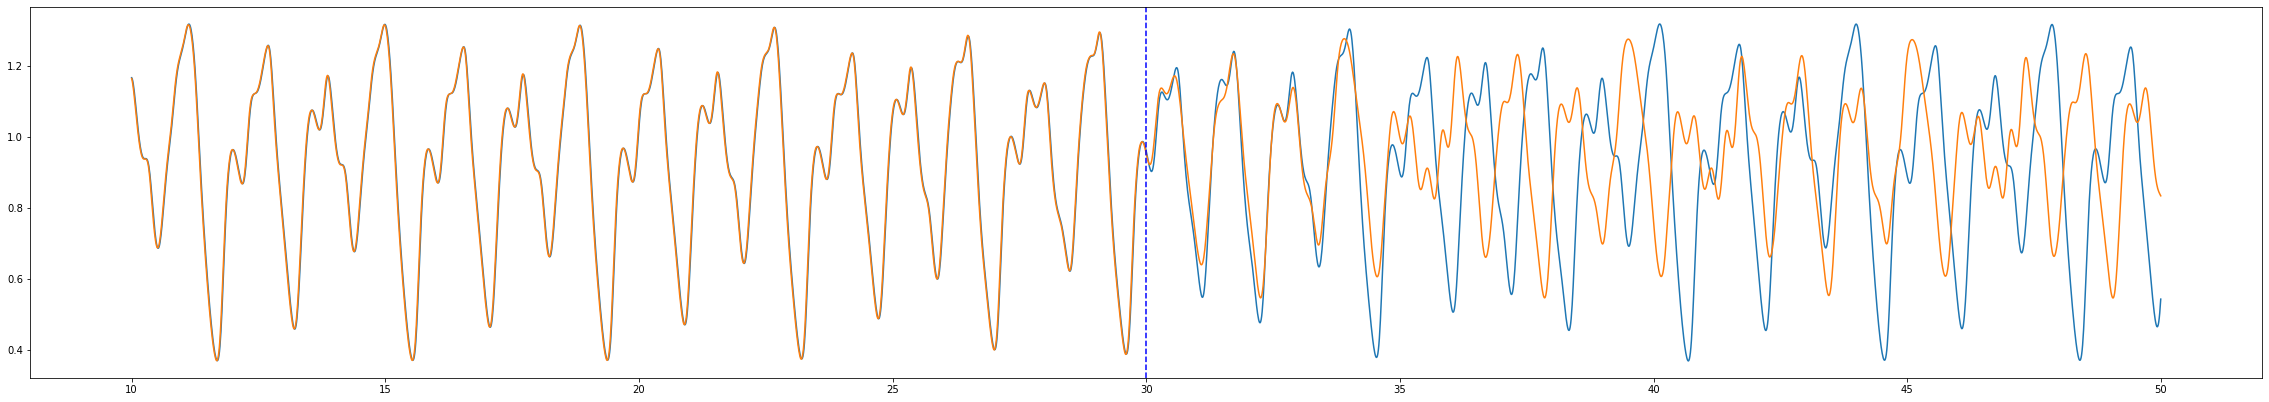

In [69]:
import torch
import numpy as np
import importlib
import utils
mg_time = np.linspace(0, RC_mg.run_time * RC_mg.d_t, RC_mg.run_time)
importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RC_mg.training_time - 2000,
    RC_mg.training_time + 2000,
    RC_mg.training_time,
    torch.tensor(output_mg),
    torch.tensor(data_mg),
    mg_time,
    1,
)



# utils.plot_time_sequence(0,RC.run_time,RC.f,p,s,time,1)